In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable
from numpy.typing import ArrayLike

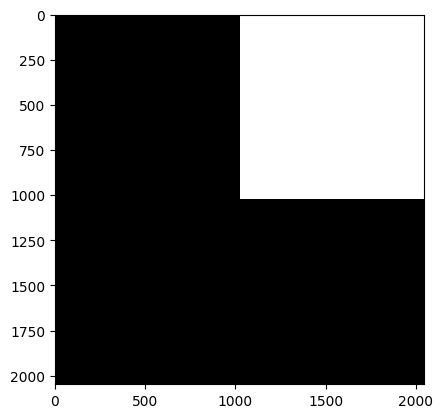

In [2]:
l = [[1,0],[1,1]]

image =np.kron(np.array(l), np.ones(shape=(1024, 1024)))

plt.imshow(image, cmap='binary', interpolation='nearest')

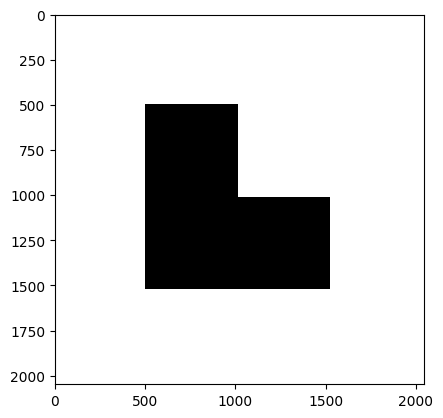

In [8]:
transl = np.array([[.5,0],
                   [0,.5]])
shift = np.array([500,500])

arr = np.column_stack(np.where(image == 1))

new_arr = ((transl * arr[:, None]).sum(axis=2) + shift[None, :]) 

new_arr = np.unique(new_arr, axis=0)
new_arr = tuple([a.flatten() for a in np.hsplit(new_arr.astype(int),2)])
new_image = np.zeros(shape=(2048, 2048))
new_image[new_arr] = 1

plt.imshow(new_image, cmap='binary', interpolation='nearest')

In [4]:
def img_to_ind(img: ArrayLike) -> ArrayLike:
    return np.column_stack(np.where(img == 1))

def ind_to_img(ind: ArrayLike) -> ArrayLike:
    ind = tuple([a.flatten() for a in np.hsplit(ind.astype(int),2)])
    img = np.zeros(shape=(2048, 2048))
    img[ind] = 1
    return img

In [48]:
def hutchinson(params: list[tuple[ArrayLike]]) -> Callable:
    def ifs(img: ArrayLike, iterations: int = 1) -> ArrayLike:
        arr = img_to_ind(img)
        for i in range(iterations):
            new_arrs = []
            for transl,shift in params:
                new_arr = ((transl * arr[:, None]).sum(axis=2) + shift[None, :])
                new_arrs.append(new_arr.astype(int))
            arr = np.vstack(new_arrs)
            arr = arr[np.logical_not(np.logical_or(
                np.logical_or(arr[:,0] > 2047, arr[:,0] < 0),
                np.logical_or(arr[:,1] > 2047, arr[:,1] < 0)
            ))]
            arr = np.unique(arr, axis = 0)
        return ind_to_img(arr) 
    return ifs

In [11]:
sierpinski_triangle_params =  [
    (np.array([[.5,0],[0,.5]]),np.array([0,512])),
    (np.array([[.5,0],[0,.5]]),np.array([1024,0])),
    (np.array([[.5,0],[0,.5]]),np.array([1024,1024]))
]
sierpinski_triangle = hutchinson(sierpinski_triangle_params)

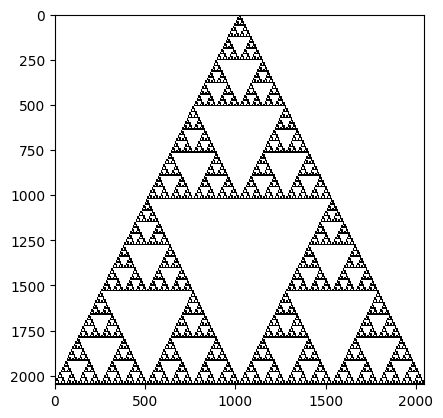

In [53]:
st_img = sierpinski_triangle(image, iterations = 7)
plt.imshow(st_img, cmap='binary', interpolation='nearest')

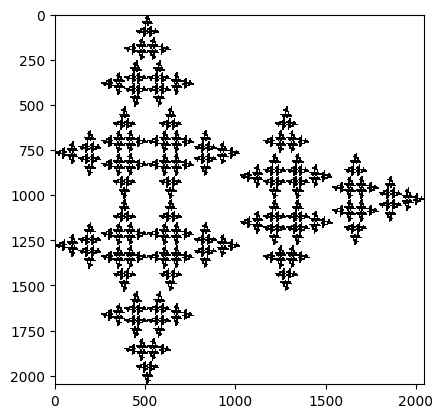

In [52]:
params_1 =  [
    (np.array([[0,-.5],[.5,0]]),np.array([1024,0])), # 1024 = 0.5 * 2048
    (np.array([[0,.5],[-.5,0]]),np.array([1024,1024])),
    (np.array([[.5,0],[0,.5]]),np.array([512,1024])) # 512 = 0.25 * 2048
]
ifs_1 = hutchinson(params_1)
ifs_1_img = ifs_1(image, iterations = 7)
plt.imshow(ifs_1_img, cmap='binary', interpolation='nearest')

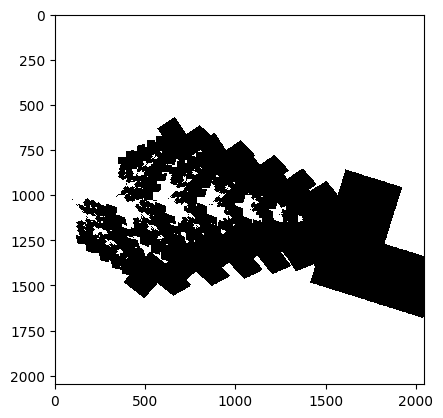

In [54]:
params_2 =  [
    (np.array([[.849,.037],[-.037,.849]]),np.array([2048*.075,2048*.1830])),
    (np.array([[.197,-.226],[.226,.197]]),np.array([2048*.4,2048*.049])),
    (np.array([[-.15,.283],[.26,.237]]),np.array([2048*.575,-2048*.084])),
    (np.array([[0,0],[0,.16]]),np.array([1024,0])) 
]
ifs_2 = hutchinson(params_2)
ifs_2_img = ifs_2(image, iterations = 7)
plt.imshow(ifs_2_img, cmap='binary', interpolation='nearest')